In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
%matplotlib inline

1. Загрузить файл hr.csv.

In [4]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [42]:
df['salary_level'] = df['salary']
df.loc[df['salary'] == 'low', 'salary_level'] = 0
df.loc[df['salary'] == 'medium', 'salary_level'] = 1
df.loc[df['salary'] == 'high', 'salary_level'] = 2
df=df.drop(['salary'], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [43]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [44]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_level
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3. Рассчитать и визуализировать корреляционную матрицу для переменных.

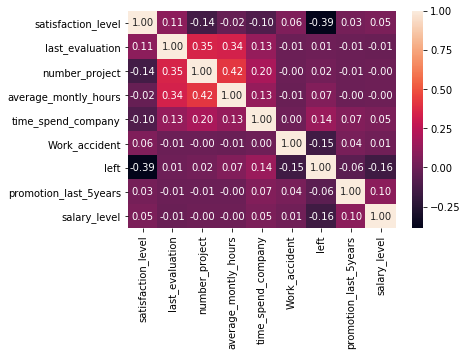

In [45]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

4. Визуализировать несколько взаимосвязей между переменными.

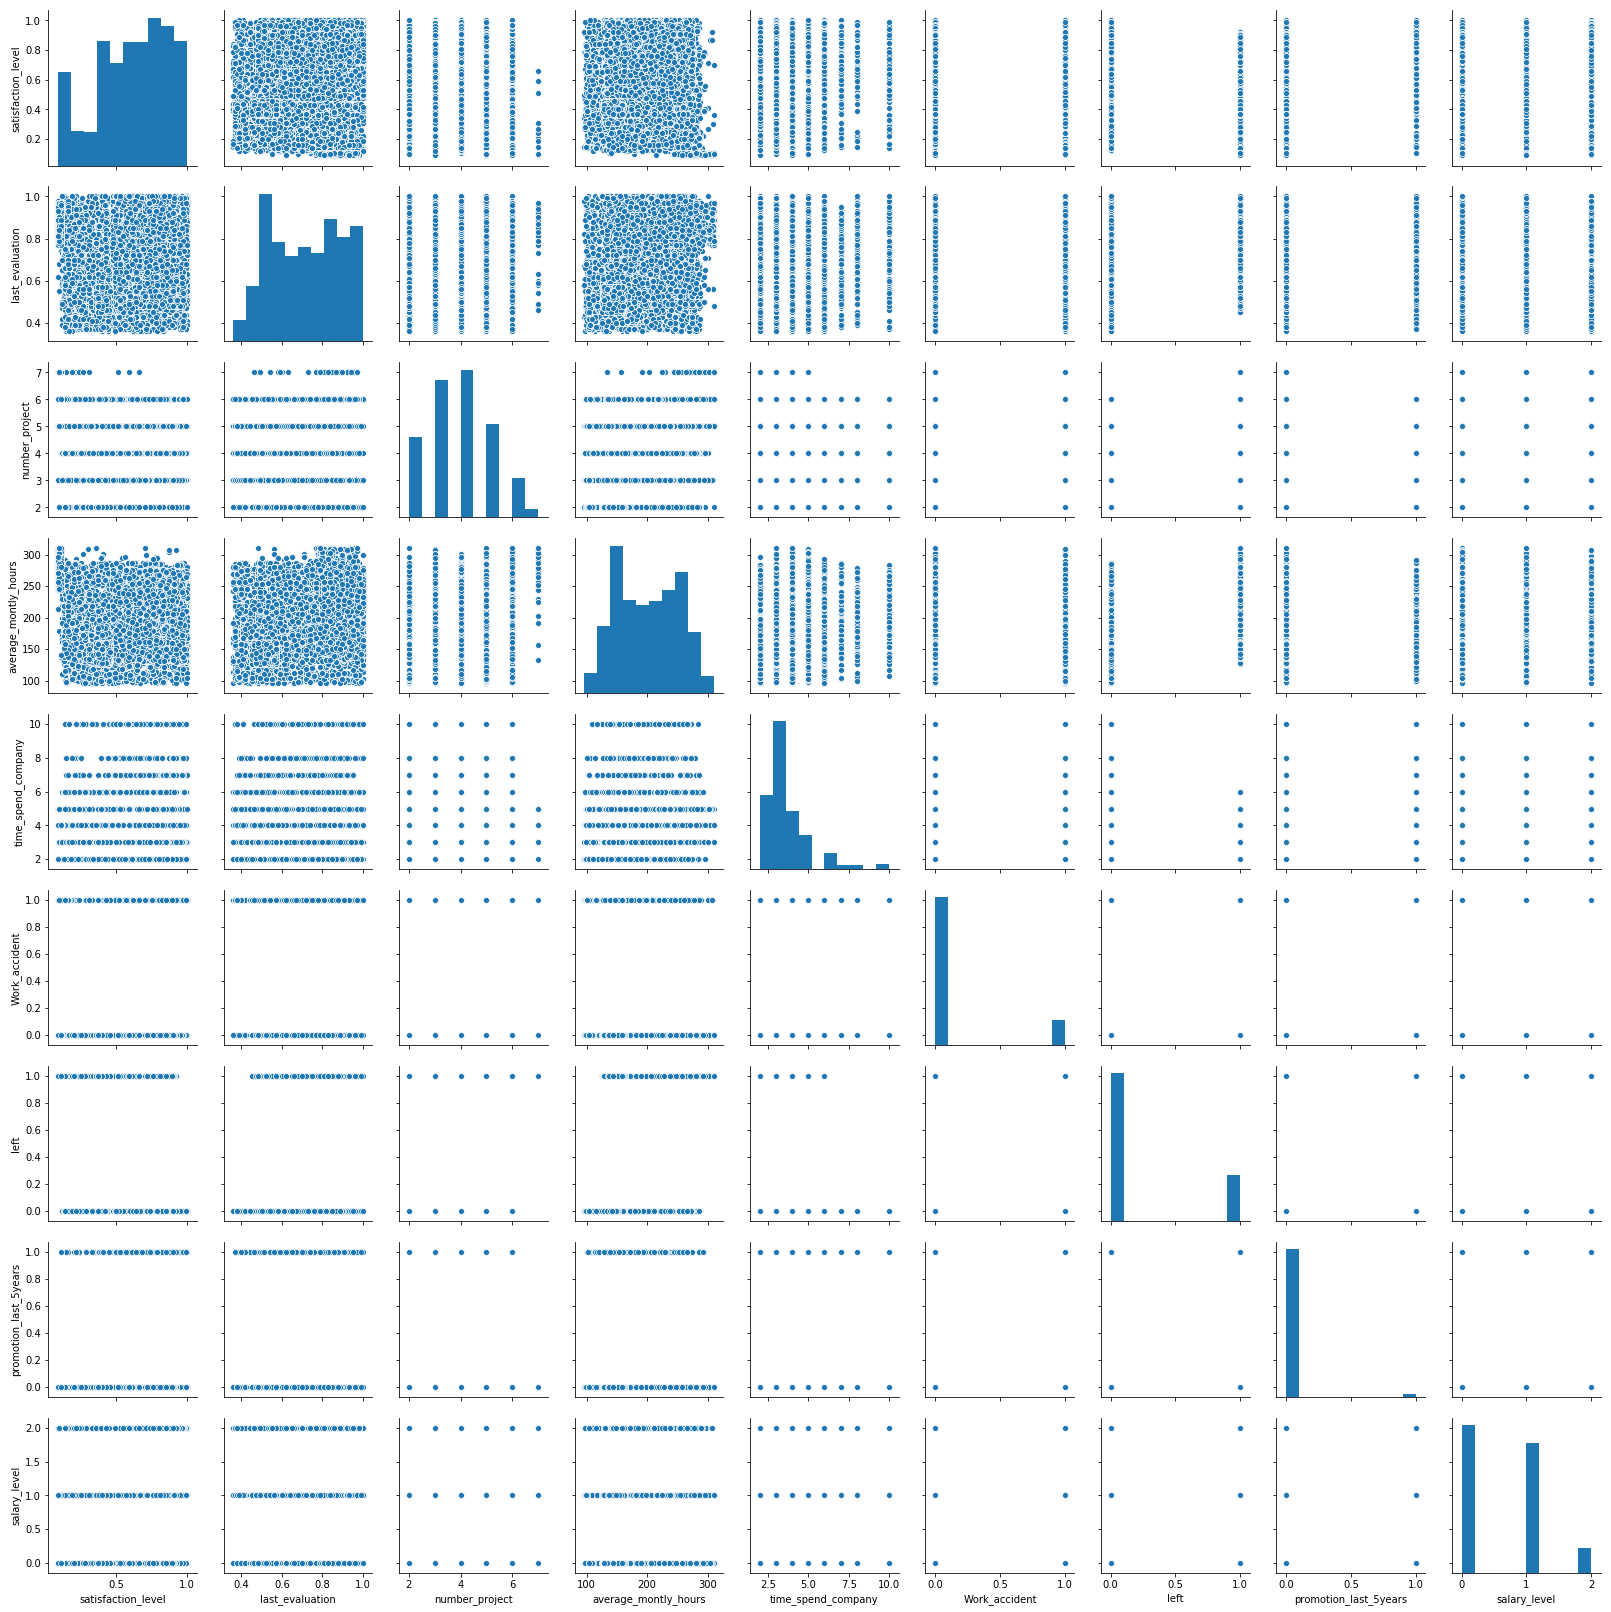

In [46]:
sns.pairplot(df)
plt.show()

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

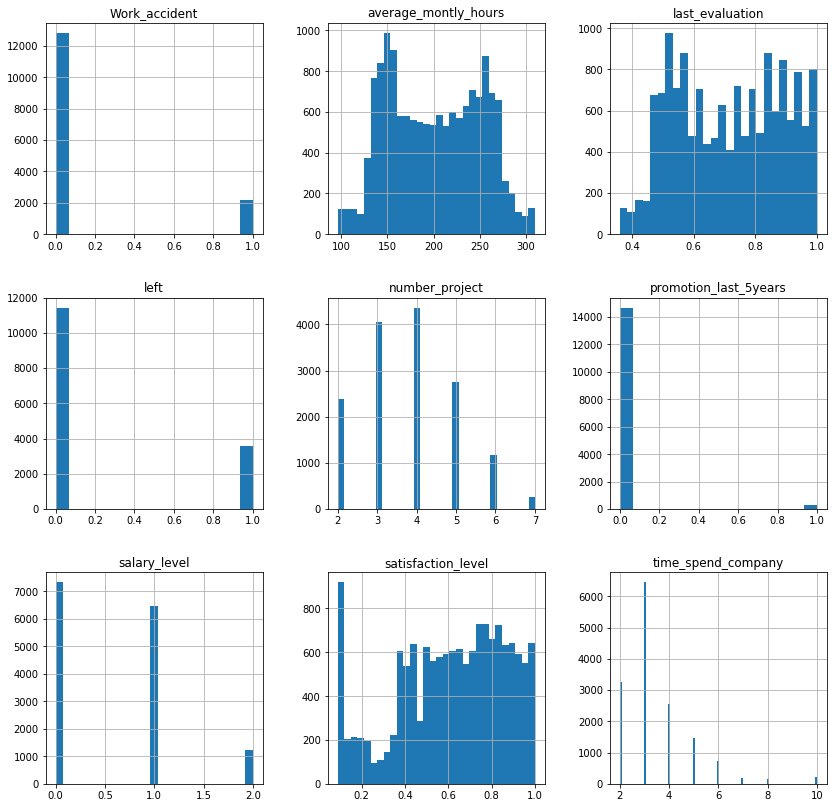

In [47]:
df.hist(figsize=(14,14),bins='auto')
plt.show()

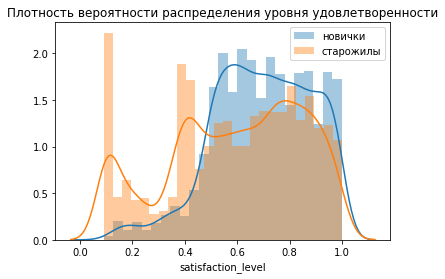

In [52]:
sns.distplot(df[df['time_spend_company']<3]['satisfaction_level'])
sns.distplot(df[df['time_spend_company']>=3]['satisfaction_level'])
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['новички', 'старожилы'])
plt.show()

In [25]:
stats.ttest_ind(df[df['time_spend_company']<3]['satisfaction_level'],
                df[df['time_spend_company']>=3]['satisfaction_level'])

Ttest_indResult(statistic=22.152494946600818, pvalue=5.1006813673569583e-107)

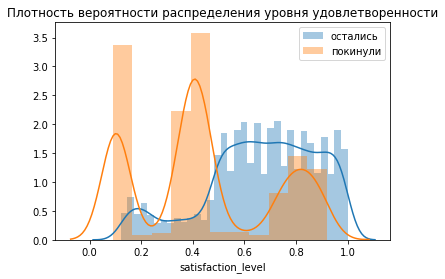

In [72]:
sns.distplot(df[df['left']==0]['satisfaction_level'])
sns.distplot(df[df['left']==1]['satisfaction_level'])
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['остались', 'покинули'])
plt.show()

In [28]:
stats.ttest_ind(df[df['left']==0]['satisfaction_level'],
                df[df['left']==1]['satisfaction_level'])

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

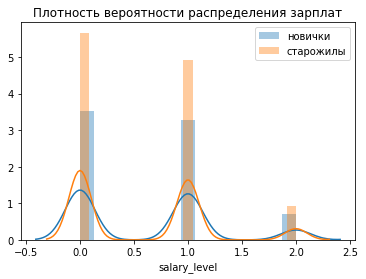

In [55]:
sns.distplot(df[df['time_spend_company']<3]['salary_level'])
sns.distplot(df[df['time_spend_company']>=3]['salary_level'])
plt.title('Плотность вероятности распределения зарплат')
plt.legend(['новички', 'старожилы'])
plt.show()

In [56]:
stats.ttest_ind(df[df['time_spend_company']<3]['salary_level'],
                df[df['time_spend_company']>=3]['salary_level'])

Ttest_indResult(statistic=2.8259972405841363, pvalue=0.004719598204467406)

6. Рассчитать сколько работников работает в каждом департаменте.

In [29]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [57]:
df.groupby('sales').count()['salary_level']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary_level, dtype: int64

7. Показать распределение сотрудников по зарплатам.

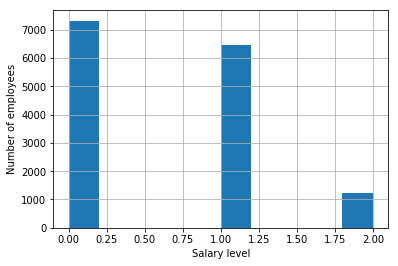

In [61]:
df['salary_level'].hist()
plt.xlabel('Salary level')
plt.ylabel('Number of employees')
plt.show()

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

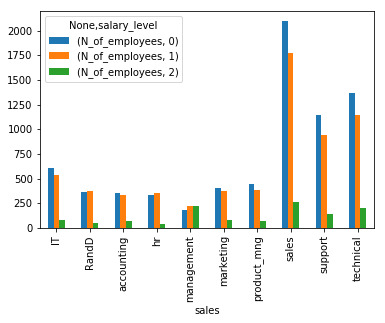

In [70]:
df.groupby(['sales','salary_level']).count()[['left']]\
.rename(columns={"left":"N_of_employees"}).unstack('salary_level').plot(kind='bar')
plt.show()

9. Сколько сотрудников покинули компанию.

In [71]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Покинули - 3571 человек, осталсь - 11428 человек.

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Как уже было показано ранее, есть разница между распределением уровня удовлетворенности у тех, кто ушел, и тех, кто остался. (по t-test различие есть, см. выше)

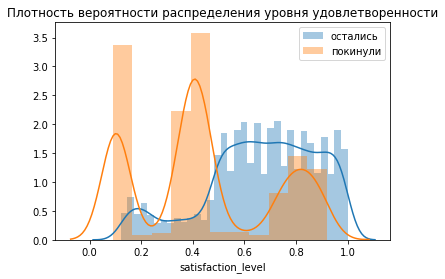

In [73]:
sns.distplot(df[df['left']==0]['satisfaction_level'])
sns.distplot(df[df['left']==1]['satisfaction_level'])
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['остались', 'покинули'])
plt.show()

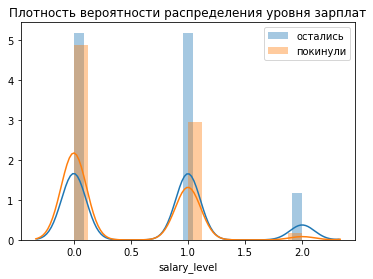

In [75]:
sns.distplot(df[df['left']==0]['salary_level'])
sns.distplot(df[df['left']==1]['salary_level'])
plt.title('Плотность вероятности распределения уровня зарплат')
plt.legend(['остались', 'покинули'])
plt.show()

In [87]:
stats.ttest_ind(df[df['left']==0]['salary_level'],
                df[df['left']==1]['salary_level'])

Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)

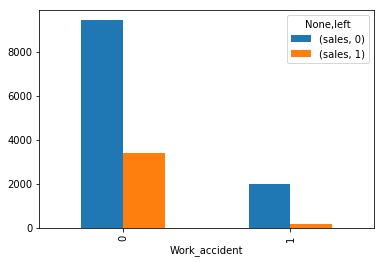

In [86]:
df.groupby(['Work_accident','left']).count()[['sales']].unstack('left').plot(kind='bar')

In [88]:
stats.ttest_ind(df[df['left']==0]['Work_accident'],
                df[df['left']==1]['Work_accident'])

Ttest_indResult(statistic=19.165804033090176, pvalue=6.613049400453939e-81)

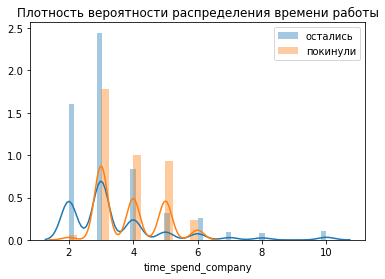

In [91]:
sns.distplot(df[df['left']==0]['time_spend_company'])
sns.distplot(df[df['left']==1]['time_spend_company'])
plt.title('Плотность вероятности распределения времени работы')
plt.legend(['остались', 'покинули'])
plt.show()

In [89]:
stats.ttest_ind(df[df['left']==0]['time_spend_company'],
                df[df['left']==1]['time_spend_company'])

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)

Выводы: покинули компанию люди, которые были не удовлетворены работой, имели меньшую зарплату, имели меньше случаев на работе (совместные проблемы - объединяют), имели опыт работы в компании от 3-х до 5-ти лет.